- 명확한 응답 변수가 없는 경우로, 명시적으로 다른 변수를 예측하거나 연관시키려고 하는 것이 없다.
- 명백한 구조/패턴이 없는 데이터에서 구조를 추출하는 경우
- 특징 추출이라고 하는 자율 개념이 사용되는 경우로, 특징 추출은 기존특징에서 새로운 특징을 생성하는 프로세스다. 이러한 새로운 특징은 원래 특징보다 더 강력할 수 있다.

### K-means 클러스터링(clustering)

예측을 하지 않는다는 것을 의미 - 대신 보기에 구조화되지 않은 데이터로부터 구조를 추출한다.

클러스터링은 데이터 포인트를 중심점(Centroids)과 함께 클러스터(Clousters)로 그룹화하는 모델의 계열이다.

클러스터(cluster): 유사하게 동작하는 데이터 포인트의 그룹.
중심점(centroid): 클러스터의 중심. 클러스터의 평균점으로 생각할 수 있다.

![](https://ws4.sinaimg.cn/large/006tNbRwgy1fyawepptrtj31040rsn1k.jpg)

예를 들어 설명해보자.
![](https://ws3.sinaimg.cn/large/006tNbRwgy1fyawi6cc2cj306c05j3yg.jpg)

각 점은 K-means 알고리즘을 적용하기 전에 사전 그룹핑을 가정하지 않도록 회색으로 표시했다. 목표는 결국 각 점에서 색상을 지정하고 그룹핑(클러슽)을 생성하는 것이다.

![](https://ws2.sinaimg.cn/large/006tNbRwgy1fyawipcilgj306q05i0sp.jpg)

최종적으로 각각의 플러스가 그룹핑된 지점에 중심이 되도록 물리적으로 중심점을 이동했다. 각 색상에 대해 평균점을 계산해 그 점을 새로운 중심점으로 만들었다. 예를 들어 세 개의 빨간색 포인트가 (1,3), (2,5), (3, 4)좌표를 가진다고 가정하자. 중심(빨간색 심자가)은 다음과 같이 계산된다.

In [1]:
import numpy as np
red_point1 = np.array([1,3])
red_point2 = np.array([2,5])
red_point3 = np.array([3,4])

red_center = (red_point1 + red_point2 + red_point3) / 3.

red_center

array([2., 4.])

In [2]:
import pandas as pd

In [3]:
beer = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt', sep= ' ')
print(beer.shape)

(20, 5)


In [4]:
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [5]:
# X를 정의
X = beer.drop('name', axis=1)

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [7]:
beer['cluster'] = km.labels_

In [8]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


인간의 검사 결과로 보면 클러스터 0은 평균적으로 칼로리 함량과 나트룸 함량, 알코올 함량이 높고 비용이 더 많이 든다는 것을 알 수 있다.  
이런 맥주들은 좀 더 무거운 맥주로 간주될 수 있다.  
클러스터 2는 평균적으로 매우 낮은 알코올 함량과 매우 적은 칼로리를 갖고 있다.  
이런 맥주들은 아마도 가벼운 맥주다. 클러스터 1은 중간에 있다.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'alcohol')

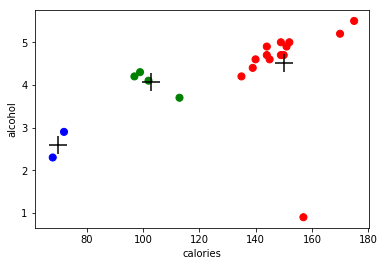

In [10]:
# 클러스터 중심의 데이터프레임을 저장
centers = beer.groupby('cluster').mean()
# 플로팅을 위한  "colors"배열을 만든다.
colors = np.array(['red', 'green','blue', 'yellow'])
# 클러스터 색깔 별로 칼로리 대 알코올의 산포도를 그린다.
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50)

# 클러스터 중심을 "+"로 표시
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s= 300, c='black')

# 라벨을 추가
plt.xlabel('calories')
plt.ylabel('alcohol')

자율 학습의 큰 부분은 인간의 검사다. 클러스터링에는 문제 도메인의 상황(context)이 없으며, 클러스터가 발견됐다는 것만 알 수 있고 클러스터의 의미를 알 수는 없다.

----

**K-means 클러스터링의 큰 부분은 클러스터의 최적 수를 파악하는 것이다.**  
미리 이 숫자를 알수 있다면 자율 학습을 사용하는 목적은 의미가 없을지도 모른다. 따라서 클러스터 분석 결과를 평가할 방법이 필요하다. 여기서 문제는 어느 종류의 예측도 수행하지 않기 때문에 알고리즘이 예측에 있어서 얼마나 적합한지를 판단할 수 없다는 것이다.  
정확도와 RMSE 같은 측정지표는 바로 쓸모 없어진다.

### 실루엣 개수(Sihouette Coefficient) SC 

실제 클러스터 할당을 알 수 없는 상황에서 클러스터링 성능을 평가하는 공통적인 측정 지표다.

![](https://ws3.sinaimg.cn/large/006tNbRwgy1fyaxfjijnuj307q034jra.jpg)

- a: 클러스터의 다른 모든 점과의 평균 거리
- b: 근처의 가장 가까운 클러스터의 다른 모든 점과의 평균 거리

범위는 -1에서 1까지다. 글로벌 스코어(global score)는 모든 관측치의 평균스코어를 취해 계산된다. 일반적으로 1의 실루엣 계수가 선호되는 반면, -1의 점수는 바람직하지 ㅇ낳다.

In [11]:
from sklearn import metrics

In [12]:
# K = 3에 대한 실루엣 계수 계산한다.
metrics.silhouette_score(X, km.labels_)

0.6731775046455792

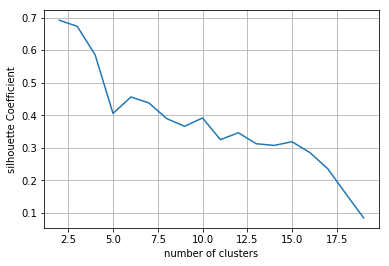

In [13]:
# K = 2에서 K = 19까지 SC를 계산한다.
k_range = range(2,20)
scores= []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))
    
# 결과를 그린다.
plt.plot(k_range, scores)
plt.xlabel("number of clusters")
plt.ylabel("silhouette Coefficient")
plt.grid(True)

언뜻보면 3개 정도가 가장 잘 클러스터링한 것처럼 보인다. 이렇게 K-means는 계산 효율과 간단하고 직관적인 특성 때문에 널리 사용되는 알고리즘이다. 그러나 K-means는 규모에 따라 크게 달라지며, 모양과 밀도가 매우 다양한 데이터에는 적합하지 않다. scikit-learn의 표준 스칼라를 사용해 데이터를 스케일링함으로써 이 문제를 해결할 수 있는 방법이 있다.

In [14]:
# 데이터의 중심과 스케일을 조정한다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

# 스케일된 데이터에 대해 3개의 클러스터로 K-means를 구한다.
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

/anaconda3/envs/new_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/new_env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [15]:
km.predict(X_scaled)

array([0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1],
      dtype=int32)

---

### 특징 추출 및 주요 구성 요소 분석

때로는 엄청난 수의 열이 있고 이 엄청난 수의 열을 처리하기에는 충분하지 않을 것 같은 행이 있다.

이것의 좋은 예인 나이브 베이즈 예제에서 사용한 send cash now예를 살펴본다.
문자 그대로 정확한 구절로 된 텍스트의 경우는  0이었다. 따라서 대신에 범주 모두에 대한 확률을 추론할 수 있게 나이브 갖어으로 바꿨다.

이 문제를 맨 먼저 다루는 이유는 차원의 저주(curse of dimensionality)라고 불리는 것 때문이다.

차원의 저주는 기본적으로 새로운 특징의 열을 소개하고 고려할 때 만드는 빈 공간을 채우기 위해 기하급수적으로 많은 행(데이터 포인트)이 필요하다고 말한다.

차원의 저주는 더 많은 데이터 포인트를 추가하거나(항상 가능하지는 않음) 차원 축소를 구현해 해결될 수 있다. 차원 축소는 단순히 행 수가 아닌 데이터셋의 열 수를 줄이는 행위다. 차원 축소를 구현하는 두 가지 방법이 있다.
- 특징 선택: 이것은 열 특징을 서브 세트로 지정하고 최상의 기능만 사용하는 행위이다.
- 특징 추출: 이것은 특징 세트를 새롭게 추출한 좌표계로 수학적으로 변환하는 행위다.

특징 추출은 좀 더 까다롭다.

일반적으로 어떤 단일 원본 열보다 더 우수한 새로운 슈퍼 열을 얻기 위해 상당히 복잡한 수식을 일반적으로 사용한다.

이렇게 하는 주요 모델을 **주요구성요소분석**(PCA, Principal Component Analysis)이라고 부른다. PCA는 더 적은 수의 열로 원본 데이터를 나타내기 위해 슈퍼 열의 수를 추출한다. 구체적인 예를 들어보자.

In [16]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv'
yelp = pd.read_csv(url, encoding='unicode-escape')

In [17]:
yelp.shape

(10000, 10)

In [18]:
# 별 5개와 별 1개 리뷰만 포함된 새로운 데이터프레임을 만든다.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [19]:
X = yelp_best_worst.text
y = yelp_best_worst.stars == 5

목표는 리뷰에 사용된 단어를 토대로 한 사람이 5개 또는 1개의 벌점을 제출했는지 여부를 측정하는 것이다. 로지스틱 회귀로 기본 선을 설정하고 이 바이너리 카테고리를 얼마나 잘 에측할 수 있는지 살펴보자.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
# 훈련 및 검정셋을 만든다.
vect = CountVectorizer(stop_words='english')
# 단어의 수를 세고, a, an, the, you 등과 같은 불용어를 제거한다.

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
# 텍스트를 문서 용어 행렬로 변환한다.
lr.fit(X_train_dtm, y_train)
# 훈련셋에 맞춘다.

lr.score(X_test_dtm, y_test)
# 검정셋의 점수를 계산한다.

/anaconda3/envs/new_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9119373776908023

따라서 모든 코퍼스의 모든 단어를 사용하면 모델의 정확도가 91%를 넘는 것 같다. 나쁘지 않음.

In [21]:
vect = CountVectorizer(stop_words='english', max_features=100)
# 가장 많이 사용되는 100개의 단어만 사용한다.

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)
# 텍스트를 문서 용어 행렬로 변환한다.
lr.fit(X_train_dtm, y_train)
# 훈련셋에 맞춘다.

lr.score(X_test_dtm, y_test)
# 검정셋의 점수를 계산한다.

(1022, 100)


/anaconda3/envs/new_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8816046966731899

정확도가 줄어든 이유는 상위 100개의 열만 보라고 헀기 때문에

In [22]:
from sklearn import decomposition
#슈퍼 열을 100개 만들 것이다.

vect = CountVectorizer(stop_words='english')
# 어떤 단어도 무시하지 않는다.

pca = decomposition.PCA(n_components=100)
# pca 객체를 인스턴스화한다.

X_train_dtm = vect.fit_transform(X_train).todense()
# 복잡한 행렬은 PCA를 통과해야 하지만, 전반적인 메시지에 영향을 미치지는 않는다.

X_train_dtm = pca.fit_transform(X_train_dtm)

X_test_dtm = vect.transform(X_test).todense()
X_test_dtm=pca.transform(X_test_dtm)

print(X_test_dtm.shape)

lr.fit(X_train_dtm, y_train)
lr.score(X_test_dtm, y_test)

(1022, 100)


/anaconda3/envs/new_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8962818003913894

행렬에는 여전히 100개의 열이 있지만, 이 열은 더 이상 코퍼스의 단어가 아니다. 이것은 열의 복잡한 변형이며 100개의 새로운 열이다. 또한 이 새로운 열 100개를 사용하면 100개의 최상위 단어를 사용하는 것보다 더 낳은 예측 성능을 얻을 수 있다.

사전에 가장 좋은 열을 선택하는 것보다 더 나은 새로운 열을 추출하기 위해서 특징 추출은 좋은 방법으로 수학 공식을 사용한다.

그러므로 이 새로운 슈퍼 열을 어떻게 시작화할 수 있을까? 이미지 분석을 사용한 예를 살펴보는 것보다 더 좋은 예는 없다고 본다. 특별히 안면인식 소프트웨어를 만들어 보자.

In [23]:
from sklearn.datasets import fetch_lfw_people

In [46]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

#이미지 배열을 조사해 모양을 찾는다. (플로팅용)
n_samples, h, w = lfw_people.images.shape

# 머신러닝을 위해 2개의 데이터를 직접 사용한다.
# 상대 픽셀 위치 정보는 이 모델에서 무시한다.

X= lfw_people.data
y= lfw_people.target
n_features=X.shape[1]

X.shape

(1288, 1850)

사람의 얼굴을 1,288개의 이미지로 모았으며, 각각의 이미지는 그 사람을 식별하는 1,850개의 특징(픽셀)을 가지고 갖고 있다. 예를 살펴보자.

In [25]:
import matplotlib.pyplot as plt

'Hugo Chavez'

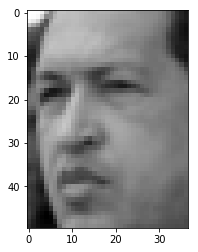

In [26]:
plt.imshow(X[0].reshape((h,w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]

'George W Bush'

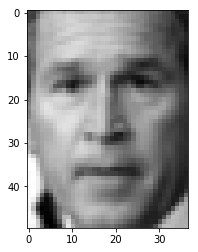

In [27]:
plt.imshow(X[100].reshape((h,w)), cmap=plt.cm.gray)
lfw_people.target_names[y[100]]

In [28]:
# 예측할 라벨은 그 사람의 ID다
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_class: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_class: 7


1,288개의 이미지, 1,850개의 특징, 7개의 클래스(사람)중에서 선택할 수 있다.
목표는 주어진 1,850개의 픽셀을 기반으로 사람의 얼굴 이름을 부여하는 분류자를 만드는 것이다.

기준선을 취하고 아무것도 하지 않은 채 로지스틱 회귀가 데이터에서 어떻게 수행될까?

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time # for timing our work

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

t0 = time() # get the time now
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#검정셋에서 사람들의 이름을 예측한다.
y_pred = logreg.predict(X_test)

print(accuracy_score(y_pred, y_test), "Accuracy")
print(time() - t0, "Seconds")

/anaconda3/envs/new_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/new_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8074534161490683 Accuracy
6.656890153884888 Seconds


6.3초 내에 검정셋 81%를 얻을 수 있었다. 나쁘지 않다.
이제 슈퍼얼굴로 해보자.

In [30]:
# 훈현 및 검정셋으로 분할
from sklearn.model_selection import train_test_split
from sklearn import decomposition

#얼굴 데이터셋(라벨이 없는 데이터셋으로 처리됨) 에서 PCA(고유 정보)를 계산한다.
#자율(unsupervised) 특징 추출/차원 감소
n_components = 75

In [31]:
# %d개의 얼굴에서 상위 %d개의 eigenfaces를 추출한다.
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

In [34]:
pca = decomposition.PCA(n_components=n_components, whiten=True).fit(X_train)

# whiten 매개변순는 추출된 열의 계산 속도를 높인다.
# eigenfaces 정규 직교 기준(orthonormal basis)에 대해 입력 데이터를 투영한다.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

이 코드는 1,850개의 처리되지 않은 열에서 75개의 추출된 열을 수집한다. 이것이 슈퍼 얼굴이다. 새로 추출한 열을 로지스틱 회귀에 연결해 비교해보자.

In [35]:
t0 = time()

#pca로 검성셋에서 사람들의 이름을 예측한다.

logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_test_pca)

print(accuracy_score(y_pred, y_test), "Accurancy")
print(time() - t0, "seconds")

0.8167701863354038 Accurancy
0.09569597244262695 seconds


/anaconda3/envs/new_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/new_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


이전보다 약 30배 빠를 뿐만 아니라, 예측 성능이 향상 되었다. 이것은 많은 열을 가진 복잡한 데이터셋에서 머신러니닝을 수행할 때 PCA와 특징 추출이 일반적으로 도움을 준다는 것을 보여준다. 데이터셋에서 이러한 패턴을 검색하고 새로운 특징 열을 추출함으로써 학습 알고리즘의 속도를 높이고 향상 시킬 수 있다.

이번에는 eigenfaces을 불리는 것을 검사하고 시각화하는 것이다. 슈퍼 열은 우리를 실망시키지 않을 것이다. 슈퍼열이 인간처럼 보이도록 우리에게 보여줄 코드는 다음과 같다.

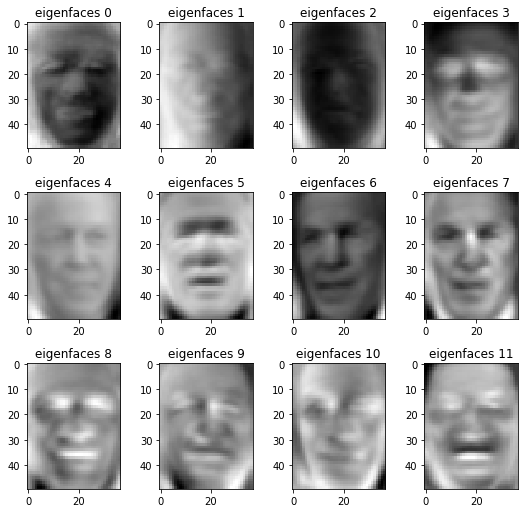

In [49]:
def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a agallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
    
#가장 잘 나타내 eigenfaces의 갤러리를 그린다.
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenfaces_titles = ["eigenfaces %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenfaces_titles)
plt.show()

데이터가 사람 얼굴에서 가장 중요한 특징이라고 여기는 것을 표현하고 있지만, 아름답지는 않게 표현됐다. 왼쪽 위에서 아래쪽으로 이동할 때 실제로 이미지가 알려주는 것이 다소 쉽게 보인다.  

첫 번째 슈퍼 열은 눈과 코와 입이 있는 매우 일반적인 얼굴 구조처럼 보인다. 거의 모든 얼굴에 있어야 하는 얼굴의 기본 특징을 나타낸다.

오른쪽에 있는 두 번째 슈퍼 열은 이미지의 그림자에 대해 알려주고 있는 것 같다. 다음 열은 피부 색조가 누구인지를 탐지하는 데 중요한 역할을 한다고 알려주는 것 같다. 세 번째 얼굴이 처음 두 개 얼굴보다 휠씬 더 어둡기 때문이다.

특징 추출을 사용하는 PCA와 같은 자율 학습 방법은 데이터를 매우 자세히 조사할 수 있게 해주고, 우리가 중요하다고 생각하는 것이 아닌 데이터가 생각하는 가장 중요한 특징을 알려준다. 특징 추출은 미래의 학습 방법을 빠르게 하고,  더 강력하게 만들며, 데이터가 어떻게 보여야 하는지에 대한 더 많은 통찰력을 주는 훌룡한 전처리 도구다.

### 특징 추출 사용의 장점
- 모델이 휠씬 빨라졌다.
- 예측 성능이 향상될 수 있다.
- 추출된 특징(eigenfaces)에 대한 통찰력을 줄 수 있다.

### 특징 추출 사용의 단점
- 과거의 열이 아닌 수학적으로 파생된 새로운 열이므로 열의 해석 가능성을 잃어버린다.
- 적은 수의 열을 추출할 때 정보가 손실되기 때문에 예측 성능이 저하될 수 있다.